In [2]:
import numpy as np
from methods import *
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
def f(y, x):
    return 1./(1. + x**2)  - (2. * y**2)
def analitica(x):
    return x / (1. + x**2)

In [22]:
a, b = 0., 1. # intervalo
y_a = 0. #condicao inicial
hs = [10**(-i) for i in range(5, 9)]
# hs = [0.5, 0.1, 0.05, 0.01]
# hs = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001, .0005, .0001]
# hs = np.linspace(0, 1, 1000)[1:-1]
# hs[0]
print(hs)

[1e-05, 1e-06, 1e-07, 1e-08]


In [23]:
# Convergência Para Euler
AE = []
for h in hs:
    # criando a malha
    x = np.linspace(a, b, int((b - a+h)/h))
    
    # solucao
    res_euler = euler(f, y_a, x)
    res_analitica = analitica(x)
    erro = res_analitica - res_euler
    
    AE.append(np.sum(np.absolute(erro)))


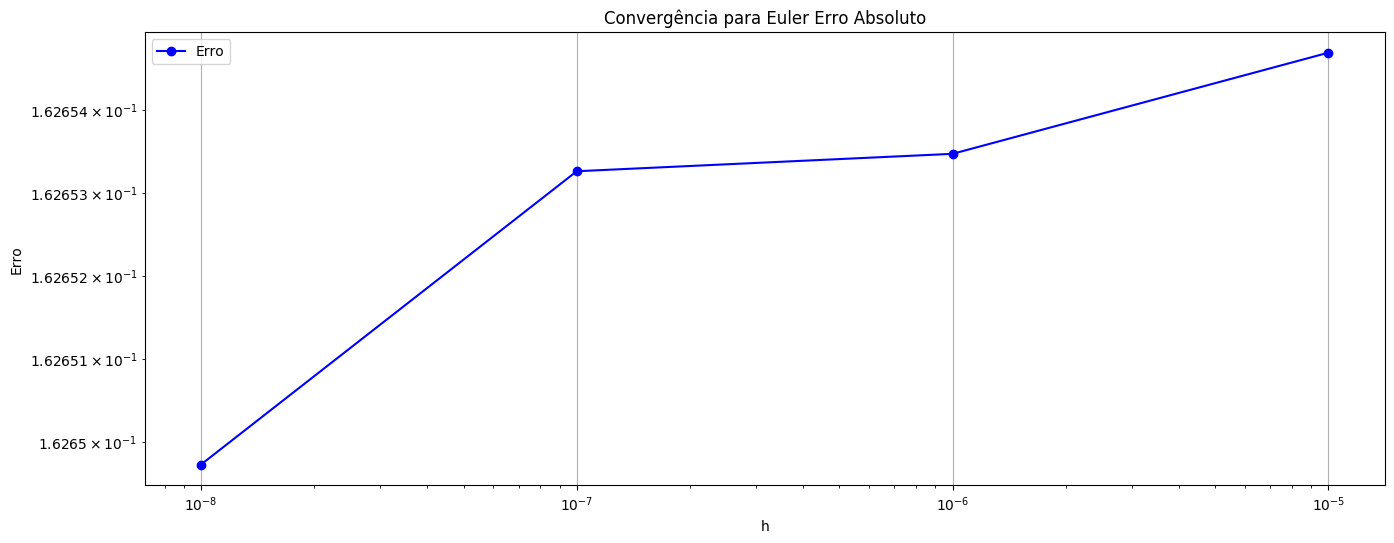

In [24]:
plt.figure(dpi=100, figsize=(16, 6))
plt.plot(hs, AE, 'b', label='Erro', marker='o')
plt.title('Convergência para Euler Erro Absoluto')
plt.legend(loc='best')
plt.grid()
plt.yscale("log")
plt.xscale("log")
plt.xlabel('h')
plt.ylabel('Erro')
plt.xticks(hs)
plt.show()

In [59]:
# Convergência Para Runge-Kutta
MSEs = []
AE = []
for h in hs:
    # criando a malha
    x = np.linspace(a, b, int((b - a+h)/h))
    
    # solucao
    res_rk4 = rk4(f, y_a, x)
    res_analitica = analitica(x)
    erro_rk4 = res_analitica - res_rk4
    
    AE.append(np.sum(np.absolute(erro_rk4)))
    
    #erros
    MSE_rk4 = np.sum(np.power(erro_rk4, 2)) / len(x)
    # plotagem
    MSEs.append(MSE_rk4)
    
    
npontos = list(map(lambda h: int(b - a+h)/h, hs))

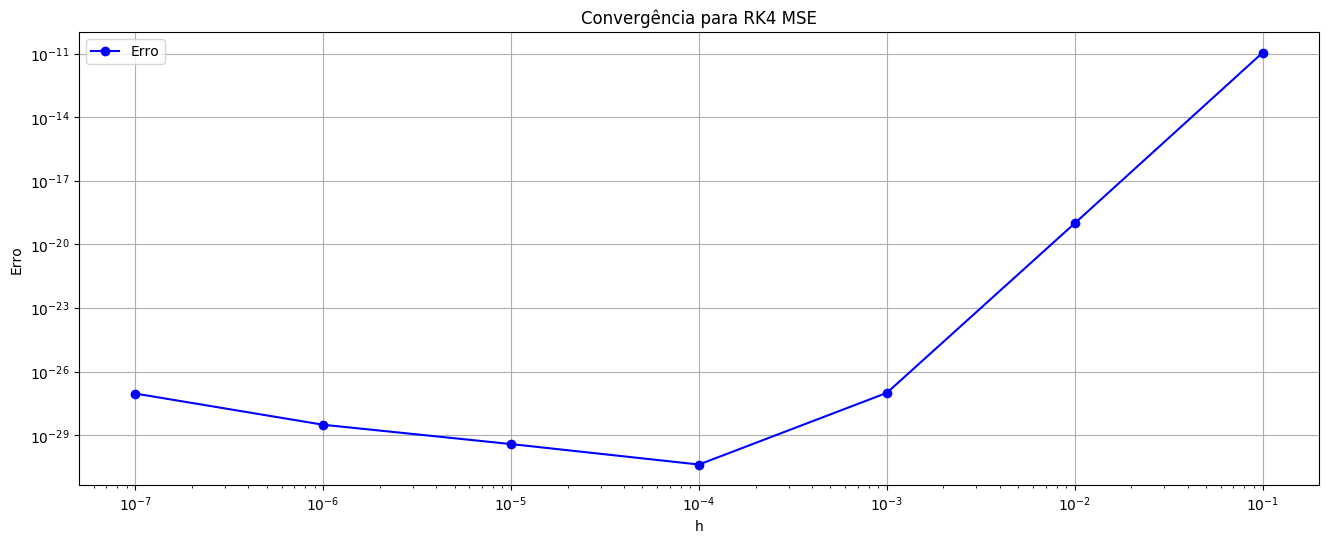

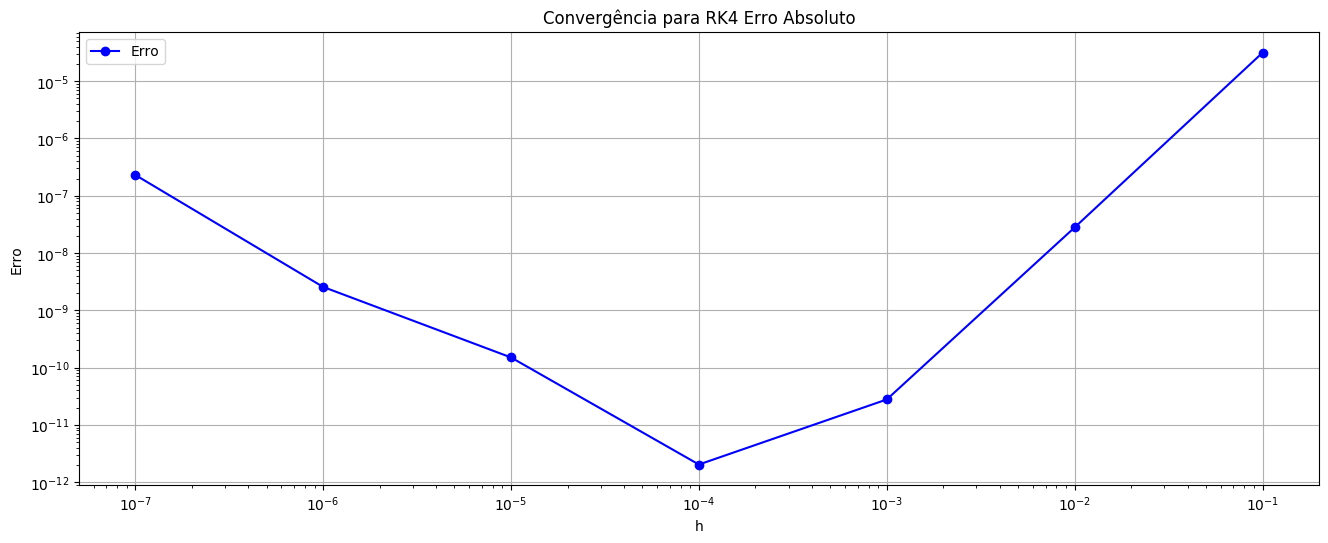

In [60]:
plt.figure(dpi=100, figsize=(16, 6))
plt.plot(hs, MSEs, 'b', label='Erro', marker='o')
plt.title('Convergência para RK4 MSE')
plt.legend(loc='best')
plt.grid()
plt.yscale("log")
plt.xscale("log")
plt.xlabel('h')
plt.ylabel('Erro') 
plt.xticks(hs)
plt.show()

plt.figure(dpi=100, figsize=(16, 6))
plt.plot(hs, AE, 'b', label='Erro', marker='o')
plt.title('Convergência para RK4 Erro Absoluto')
plt.legend(loc='best')
plt.grid()
plt.yscale("log")
plt.xscale("log")
plt.xlabel('h')
plt.ylabel('Erro') 
plt.xticks(hs)
plt.show()


MSE Euler = 1.083333E-02
MSE Runge-Kutta4 = 7.502119E-06


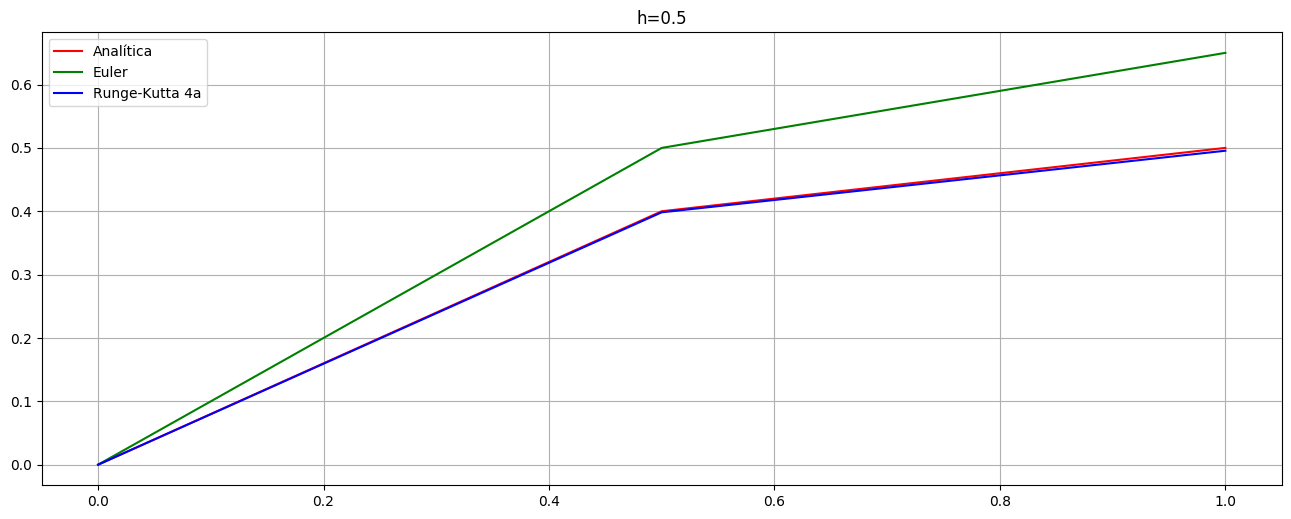

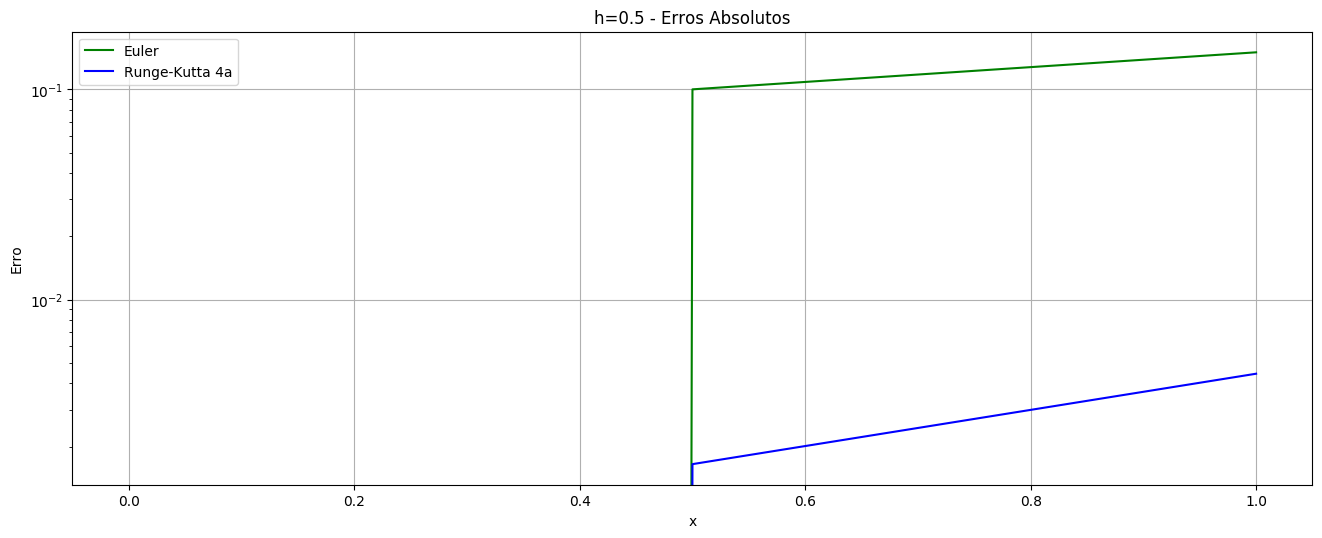

MSE Euler = 3.533348E-04
MSE Runge-Kutta4 = 1.106182E-11


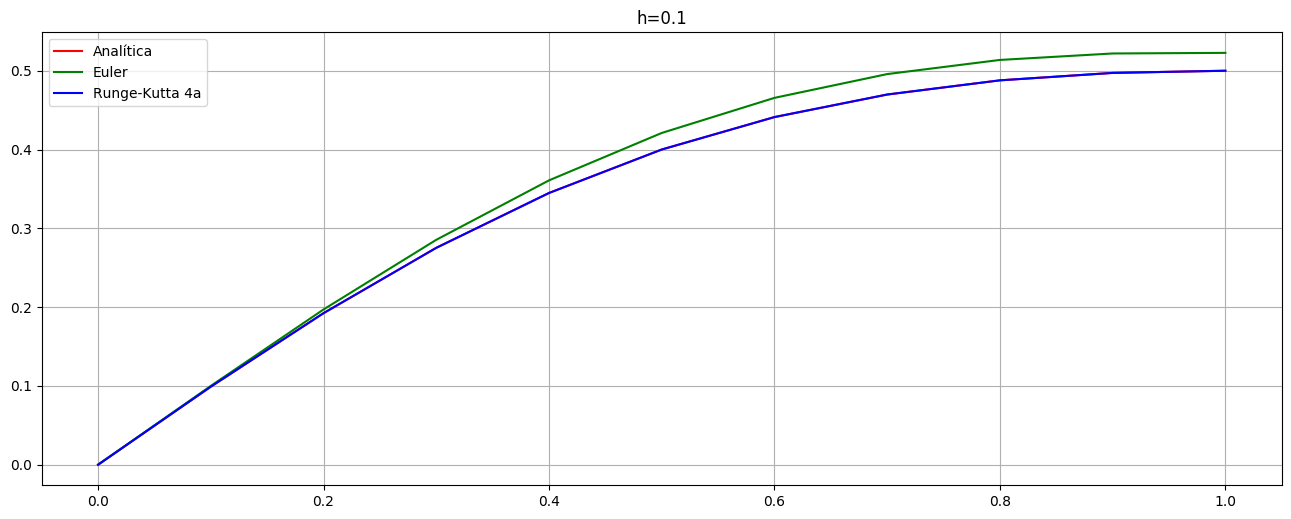

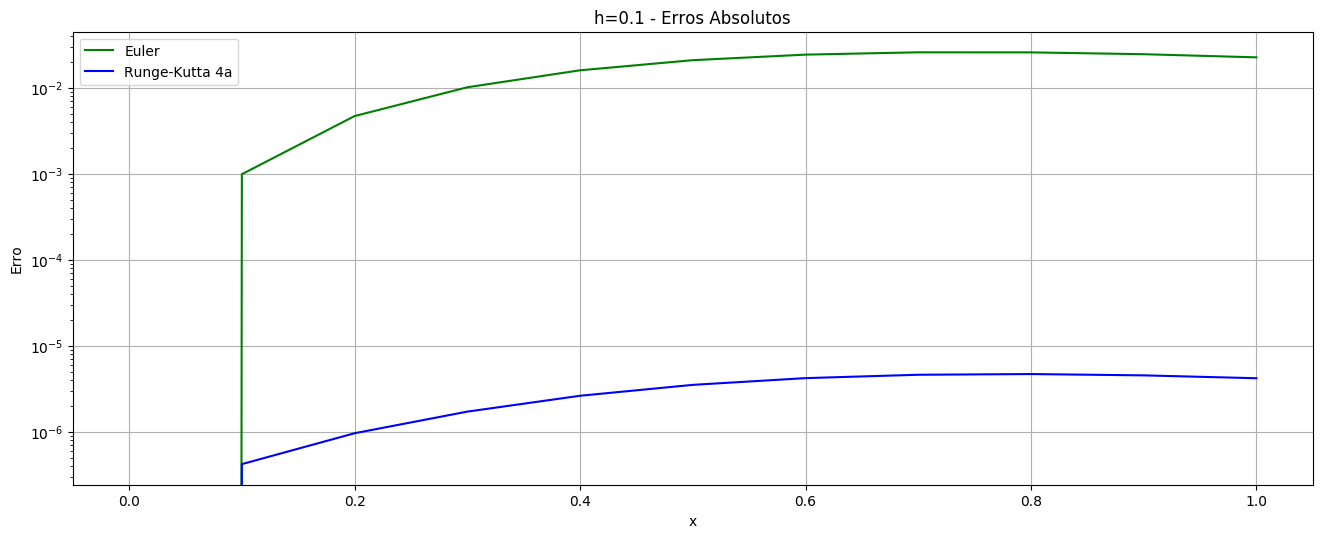

MSE Euler = 8.709849E-05
MSE Runge-Kutta4 = 4.047314E-14


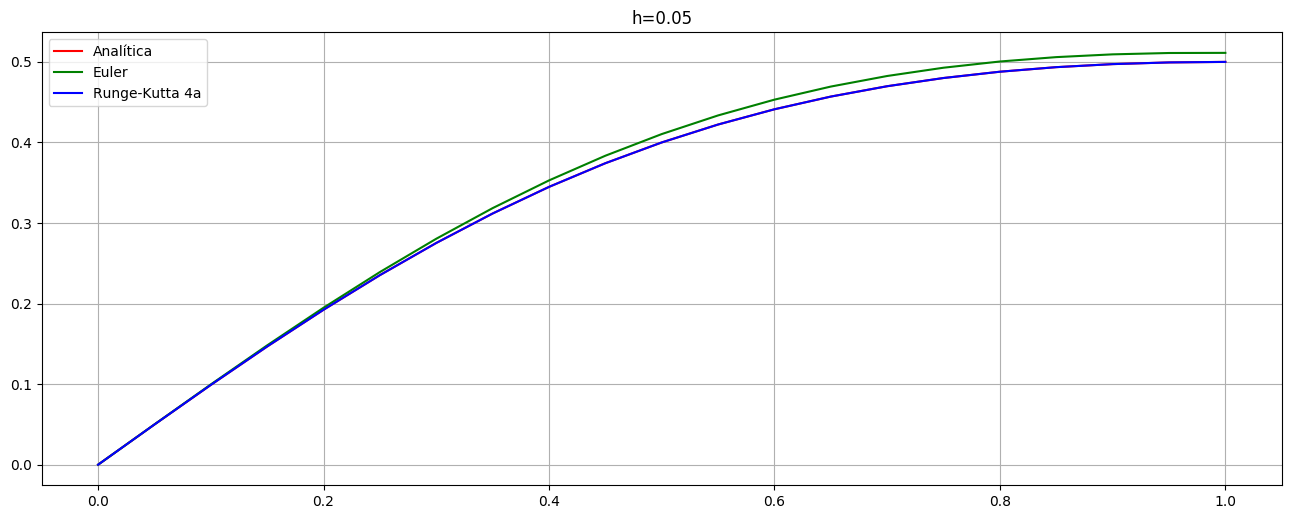

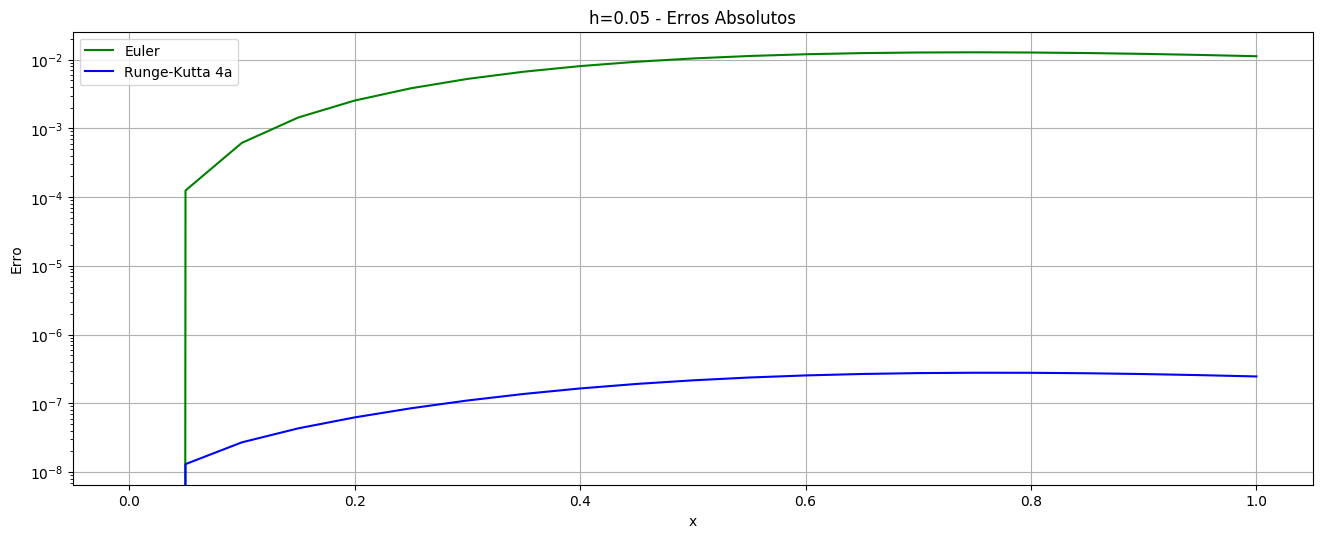

MSE Euler = 3.450198E-06
MSE Runge-Kutta4 = 9.865622E-20


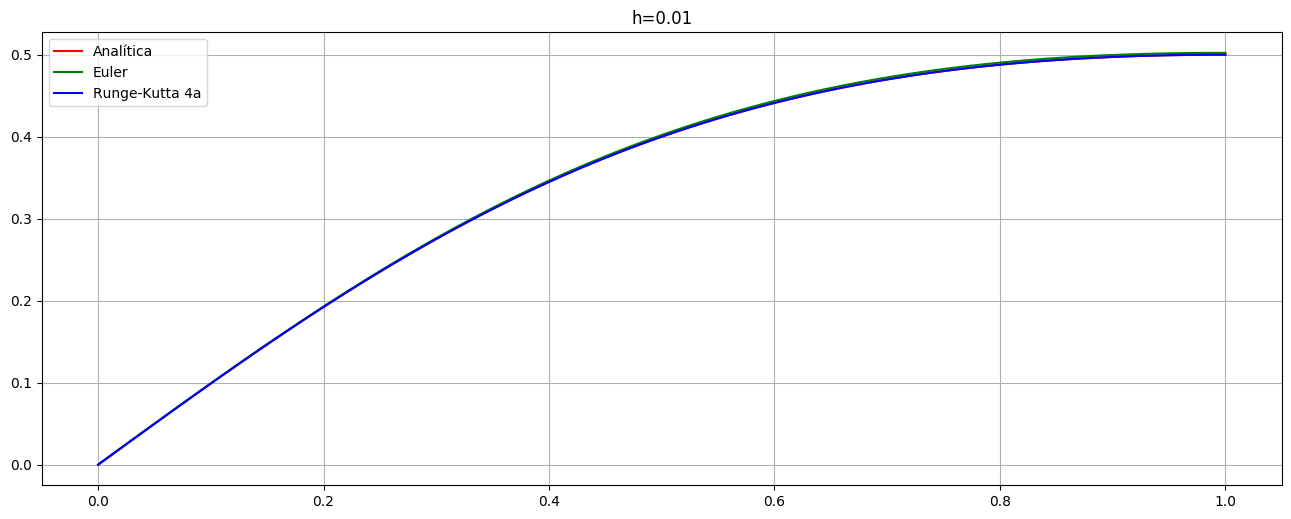

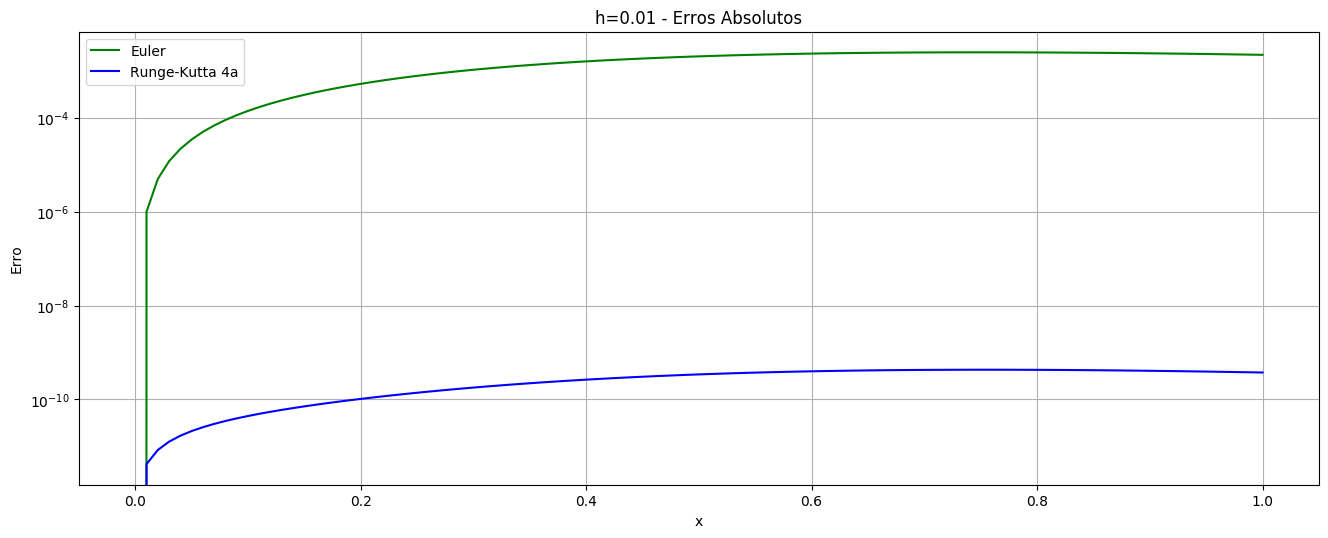

In [11]:
hs = [0.5, 0.1, 0.05, 0.01]
for h in hs:
    # criando a malha
    x = np.linspace(a, b, int((b - a+h)/h))
    
    # solucao
    res_euler = euler(f, y_a, x)
    res_rk4 = rk4(f, y_a, x)
    res_analitica = analitica(x)
    
    #erros
    erro_euler = res_analitica - res_euler
    erro_rk4 = res_analitica - res_rk4
    MSE_euler = np.sum(np.power(erro_euler, 2)) / len(x)
    MSE_rk4 = np.sum(np.power(erro_rk4, 2)) / len(x)
    print("MSE Euler = {0:.6E}".format(MSE_euler))
    print("MSE Runge-Kutta4 = {0:.6E}".format(MSE_rk4))
    
    # plotagem
    plt.figure(dpi=100, figsize=(16, 6))
    plt.plot(x, res_analitica, 'r', label='Analítica')
    plt.plot(x, res_euler, 'g', label='Euler')
    plt.plot(x, res_rk4, 'b', label='Runge-Kutta 4a')
    plt.title('h={}'.format(h))
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    
    plt.figure(dpi=100, figsize=(16, 6))
    plt.plot(x, np.absolute(erro_euler), 'g', label='Euler')
    plt.plot(x, np.absolute(erro_rk4), 'b', label='Runge-Kutta 4a')

    plt.title('h={} - Erros Absolutos'.format(h))
    plt.legend(loc='best')
    plt.yscale("log")
    plt.xlabel('x')
    plt.ylabel('Erro') 
    plt.grid()
    plt.show()

In [37]:
h = 0.1
x = np.linspace(a, b, int((b - a+h)/h))
# solucao
res_rk4 = rk4(f, y_a, x)
res_analitica = analitica(x)
erro_rk4 = res_analitica - res_rk4
maior = np.max(np.absolute(erro_rk4))

ite = 0
err = np.infty
print(maior)
while ite < 1000 and err > maior:
    x = np.linspace(a, b, int((b - a+h)/h))
    # solucao
    res_euler = euler(f, y_a, x)
    res_analitica = analitica(x)
    erro_ = res_analitica - res_euler
    err = np.max(np.absolute(erro_))
    print(ite, '{0:.8E}'.format(err))
    h = h/2
    ite+=1


print(ite, '{0:.8E}'.format(err))
print(h)
print(ite)

4.681064296852e-06
0 2.59466097E-02
1 1.27688580E-02
2 6.48382972E-03
3 3.18486803E-03
4 1.56868340E-03
5 7.83415048E-04
6 3.92091360E-04
7 1.95834881E-04
8 9.78265881E-05
9 4.89097085E-05
10 2.44563470E-05
11 1.22273524E-05
12 6.11332167E-06
13 3.05664683E-06
14 3.05664683E-06
6.103515625e-06
14
